This works come from kaggle  

LINK[https://www.kaggle.com/brjapon/eda-of-crwu-bearings-fault-classification]

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from pylab import rcParams
import matplotlib.pyplot as plt

import os

In [7]:
for dirname, _, filenames in os.walk('./CWRU'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./CWRU\CWRU_48k_load_1_CNN_data.npz
./CWRU\feature_time_48k_2048_load_1.csv
./CWRU\raw\B007_1_123.mat
./CWRU\raw\B014_1_190.mat
./CWRU\raw\B021_1_227.mat
./CWRU\raw\IR007_1_110.mat
./CWRU\raw\IR014_1_175.mat
./CWRU\raw\IR021_1_214.mat
./CWRU\raw\OR007_6_1_136.mat
./CWRU\raw\OR014_6_1_202.mat
./CWRU\raw\OR021_6_1_239.mat
./CWRU\raw\Time_Normal_1_098.mat


Fault type identification
There are 10 types of faults, linked to each bearing deffect:  

- Ball_007_1: Ball defect (0.007 inch)
- Ball_014_1: Ball defect (0.014 inch)
- Ball_021_1: Ball defect (0.021 inch)
- IR_007_1: Inner race fault (0.007 inch)
- IR_014_1: Inner race fault (0.014 inch)
- IR_021_1: Inner race fault (0.021 inch)
- Normal_1: Normal
- OR_007_6_1: Outer race fault (0.007 inch, data collected from 6 O'clock position)
- OR_014_6_1: Outer race fault (0.014 inch, 6 O'clock)
- OR_021_6_1: Outer race fault (0.021 inch, 6 O'clock)

In [9]:
data_time = pd.read_csv("./CWRU/feature_time_48k_2048_load_1.csv")
data_time.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [11]:
data_time.value_counts()

max      min       mean      sd        rms       skewness   kurtosis    crest     form       fault       fault_code
0.15730  -0.22364  0.011614  0.060820  0.061904  -0.235146  -0.153645   2.541028  5.329903   Normal_1    6.0           1
1.46700  -1.25440  0.018469  0.266683  0.267257  -0.137361   3.736476   5.489105  14.470363  IR_007_1    3.0           1
1.46140  -1.45780  0.018562  0.284901  0.285436   0.217370   4.793806   5.119894  15.377651  IR_007_1    3.0           1
1.46240  -1.52660  0.022740  0.281499  0.282348  -0.221688   5.222693   5.179430  12.416202  IR_007_1    3.0           1
1.46300  -1.47320  0.021675  0.287285  0.288032   0.117130   4.454458   5.079302  13.288755  IR_007_1    3.0           1
                                                                                                                      ..
0.51465  -0.57307  0.013730  0.135441  0.136102  -0.113438   1.568732   3.781346  9.913128   Ball_014_1  1.0           1
0.51445  -0.50944  0.007652  0.176902

Encode fault types with numbers

In [10]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder() #Fault유형에 따라 자동으로 fault_code를 부여해주는 애 인가보다
data_time["fault_code"] = ord_enc.fit_transform(data_time[["fault"]])
data_time[["fault", "fault_code"]]

,fault,fault_code
0,Ball_007_1,0.0
1,Ball_007_1,0.0
2,Ball_007_1,0.0
3,Ball_007_1,0.0
4,Ball_007_1,0.0
...,...,...
2295,Normal_1,6.0
2296,Normal_1,6.0
2297,Normal_1,6.0
2298,Normal_1,6.0


In [12]:
# List labels of bearing deffects
data_time.fault_code.unique() # Equivalent: data_time['fault_code'].unique()

array([0., 1., 2., 3., 4., 5., 7., 8., 9., 6.])

In [13]:
# How many data points are there for each defect type?
data_time[['fault_code', 'fault']].value_counts()

#각 fault마다 230개씩 존재함을 확인

fault_code  fault     
0.0         Ball_007_1    230
1.0         Ball_014_1    230
2.0         Ball_021_1    230
3.0         IR_007_1      230
4.0         IR_014_1      230
5.0         IR_021_1      230
6.0         Normal_1      230
7.0         OR_007_6_1    230
8.0         OR_014_6_1    230
9.0         OR_021_6_1    230
dtype: int64

In [14]:
# View some rows of the time serie for 'Ball_007_1' defect
data_time[data_time['fault'] == "Ball_007_1"]

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault,fault_code
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1,0.0
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1,0.0
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1,0.0
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1,0.0
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225,0.49692,-0.42787,0.018134,0.150290,0.151343,0.007713,-0.056754,3.283394,8.345722,Ball_007_1,0.0
226,0.63920,-0.52550,0.019247,0.161945,0.163045,0.005977,0.056390,3.920384,8.471037,Ball_007_1,0.0
227,0.43872,-0.38907,0.018747,0.131881,0.133175,-0.047987,-0.133409,3.294305,7.103795,Ball_007_1,0.0
228,0.49254,-0.54240,0.018965,0.152193,0.153333,-0.027618,0.290199,3.212226,8.084990,Ball_007_1,0.0


# EDA!

In [15]:
# Dataframe keeps only the labeled column (with an ordinal number)
data_time_labeled = data_time.drop('fault', 1)

C:\Users\qhrrl\AppData\Local\Temp/ipykernel_25148/1697948075.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_time_labeled = data_time.drop('fault', 1)


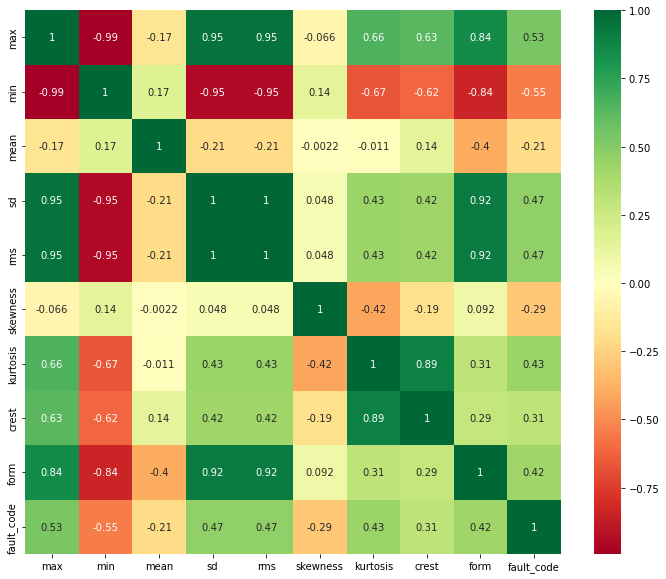

In [16]:
rcParams['figure.figsize'] = 12, 10
sns.heatmap(data_time_labeled.corr(),annot=True,cmap='RdYlGn') #상관관계를 히트맵으로 표현해본다
fig=plt.gcf()
plt.show()

In [17]:
# Split bearing defects according to their location
ball_defects = ['Normal_1','Ball_007_1','Ball_014_1','Ball_021_1']
IR_defects =   ['Normal_1','IR_007_1','IR_014_1','IR_021_1']
OR_defects =  ['Normal_1','OR_007_6_1','OR_014_6_1','OR_021_6_1']

In [18]:
# Split features in two groups for better visualization
features_basic_subset =    data_time[['max','min','mean','sd','rms', 'fault']]
features_advanced_subset = data_time[['skewness','kurtosis','crest','form', 'fault']]

In [19]:
# Filter rows for the selected list of defects
defect_subset = features_basic_subset

ball_defects_data = defect_subset.loc[defect_subset['fault'].isin(ball_defects)]
IR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(IR_defects)]
OR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(OR_defects)]

ball_defects_data['fault'].value_counts()

Ball_007_1    230
Ball_014_1    230
Ball_021_1    230
Normal_1      230
Name: fault, dtype: int64

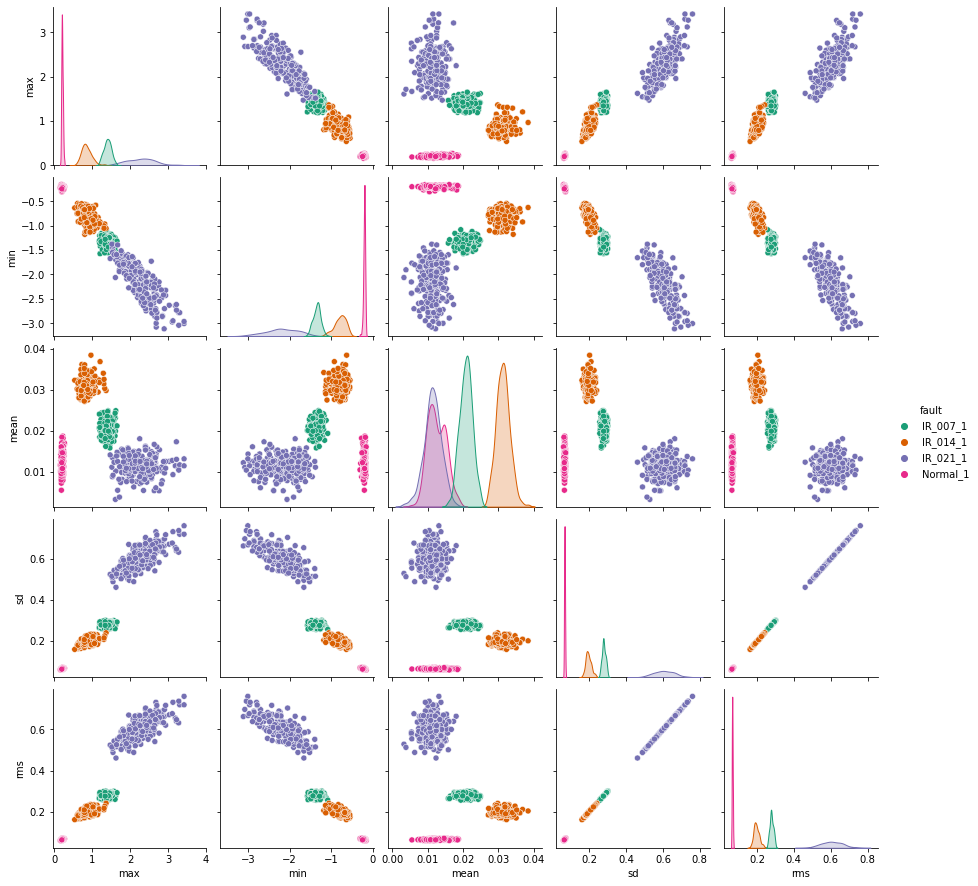

In [20]:
rcParams['figure.figsize'] = 6, 5
sns.pairplot(IR_defects_data,hue='fault',palette='Dark2')